In [1]:
import pandas as pd
import math
import numpy as np
import random

import traja
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats




C:\Users\Lenovo\anaconda3\envs\navigation\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



forMod = ({
    'x':[0],
    'y':[0],
    'angle_trig':[90],
    'angle':[0],
    'near_wall':[0]
               })
df = pd.DataFrame(forMod)
print(df)

### сколько шагов сделает мышь?

In [2]:
N = 400

### берем значения power law

In [3]:
#making data-based power-law distributions for zones 0(center), Corners, Walls 
pl0_x = np.linspace(2,25,100)
pl0_y = 59.6 * (pl0_x ** (-0.9396))
plC_x = np.linspace(2,25,100)
plC_y = 480.3 * (plC_x ** (-1.805))
plW_x = np.linspace(2,25,100)
plW_y = 272.99 * (plW_x ** (-1.189))

In [9]:
#data-based angle distribution
import pickle
# Read dictionary pkl file
with open('angOrigDistr.pkl', 'rb') as fp:
    angleDistr = pickle.load(fp)
#     print('dictionary')
del angleDistr['wall']
# print(angleDistr)
with open('angWallsDistr.pkl', 'rb') as fp:
    angWallDistr = pickle.load(fp)
#     print('dictionary')
# print(angWallDistr)

In [30]:
%matplotlib inline

fig, axs = plt.subplots(2,2)
axs[0,0].plot(angWallDistr['par24'][0], angWallDistr['par24'][1], c='darkblue')
axs[0,0].set_title('par24')
axs[1,0].plot(angWallDistr['par13'][0], angWallDistr['par13'][1], c='darkred')
axs[1,0].set_title('par13')
axs[0,1].plot(angWallDistr['reg24'][0], angWallDistr['reg24'][1], c='cyan')
axs[0,1].set_title('reg24')
axs[1,1].plot(angWallDistr['reg13'][0], angWallDistr['reg13'][1], c='bisque')
axs[1,1].set_title('reg13')
for i in range(2):
    for j in range(2):
        axs[i,j].set_xlim([-200, 200])
        axs[i,j].set_ylim([0, 250])


##### model making function

pl_x = np.linspace(2,25,100)
pl_y = 141.7 * (pl_x ** (-1.32))
plt.figure()
plt.plot(pl_x, pl_y)
#сделали руками норм коши дистрибьюшн
c_x = np.linspace(-100,100,200)
c_y = (1 / math.pi) * (15 / ((c_x ** 2) + (15 ** 2)))
plt.figure()
plt.plot(c_x, c_y)

mmpl = random.choices(pl_x, weights = pl_y, k = n)
plt.figure()
plt.hist(mmpl, bins=50)
plt.title('power-law random output')
plt.show()
kkoch = random.choices(c_x, weights = c_y, k = n)
plt.figure()
plt.hist(kkoch, bins=50)
plt.title('cauchy random output')
plt.show()


In [19]:
def makeNewTraj(N):
    #1 полное построение траектории

    mm0 = random.choices(pl0_x, weights = pl0_y, k = N)
    mmC = random.choices(plC_x, weights = plC_y, k = N)
    mmW = random.choices(plW_x, weights = plW_y, k = N)
    #plt.hist(mm, bins=50)
    #plt.figure()
    #plt.plot(mm)

    x = 0
    y = 0
    near = 0
    ang = 0
    ang_trig = 360 + 90 - ang
    if ang_trig > 360:
        ang_trig -= 360
    x_all = [x]
    y_all = [y]
    near_all = [near]
    ang_all = [ang]
    angle_all = [ang]
    ang_trig_all = [ang_trig]
    lastNear = False


    i = 0
    while i < N:
        print(i)
        x = x_all[i]
        y = y_all[i]
        near = near_all[i]
        if near == 0:
            step = mm0[i]
        elif near >= 10:
            step = mmC[i]
        elif (near >= 1) and (near <= 4):
            step = mmW[i]
        angle = angle_all[i]
        angle_trig = ang_trig_all[i]
        if angle > 360:
            print("alarm")
        #варики в разных зонах
        if near == 0:
            deltang = random.choices(angleDistr['0'][0], weights = angleDistr['0'][1], k = 1)[0]
            ang += deltang
        #elif (near==1) or (near==3):
        elif (near == 2) or (near == 4):
            if ((angle >= -25) and (angle <= 25)) or ((angle >= 155) and (angle <= 205)) or (angle > 335):
                deltang = random.choices(angWallDistr['par24'][0], weights = angWallDistr['par24'][1], k = 1)[0]
                print('yes')
            #дучше не элсе а элиф с адекватным условием
            else:
                deltang = random.choices(angWallDistr['reg24'][0], angWallDistr['reg24'][1], k = 1)[0]
            ang += deltang
        #elif (near == 2) or (near == 4):
        elif (near==1) or (near==3):
            if ((ang >= - 65) and (ang < 65)) or (ang > 295) or ((angle > 115) and (angle < 245)):
                deltang = random.choices(angWallDistr['reg13'][0], weights = angWallDistr['reg13'][1], k = 1)[0]
            else:
                print('yes')
                deltang = random.choices(angWallDistr['par13'][0], weights = angWallDistr['par13'][1], k = 1)[0]
            ang += deltang
        #elif (near >= 1) and (near <= 4):
            #deltang = random.choices(angleDistr['wall'][0], weights = angleDistr['wall'][1], k = 1)[0]
            #ang += deltang
        elif (near >= 10) and (near <= 40):
            deltang = random.choices(angleDistr['corn'][0], weights = angleDistr['corn'][1], k = 1)[0]
            ang += deltang
        else:
            print('error with near value')    

        if ang < 0:
            ang += 360
        if ang > 360:
            ang -= 360
        if ang > 360:
            print('too big value of ang')
            ang -= 360
            print(ang)

        ang_trig = 360 + 90 - ang
        if ang_trig >= 360:
            ang_trig -= 360
        if ang_trig >= 360:
            ang_trig -= 360
        #вычислим x y из step и ang
        dx = step * math.cos(math.radians(ang_trig))
        dy = step * math.sin(math.radians(ang_trig))
        x += dx
        y += dy

        if x < -32:
            if y > 32:
                near = 40
            elif y < -32:
                near = 30
            else:
                near = 4
        elif x > 32:
            if y > 32:
                near = 10
            elif y < -32:
                near = 20
            else:
                near = 2
        elif y > 32:
            near = 1
        elif y < -32:
            near = 3
        elif (x > -32) and (y < 32) and (y > -32) and (x < 32):
            near = 0
        else:
            print('hmm near mistake')

        if (x >= -40) and (x <= 40) and (y >= -40) and (y <= 40):
            if lastNear and (near == 0):
                tryEscWall = random.choices([1, 0], [0.1, 0.9], k = 1)[0]
                if tryEscWall == 1:
                    x_all.append(x)
                    y_all.append(y)
                    angle_all.append(ang)
                    ang_trig_all.append(ang_trig)
                    near_all.append(near)
                    print('ok')
                    i += 1
                    if (near > 0) and (near <= 4):
                        lastNear=True
                        nlastnear = near
                    else:
                        lastNear = False
                elif tryEscWall == 0:
                    print('mouse you cant escape wall')
            else:            
                x_all.append(x)
                y_all.append(y)
                angle_all.append(ang)
                ang_trig_all.append(ang_trig)

                near_all.append(near)
                print('ok')
                i += 1
                if (near > 0) and (near <= 4):
                    lastNear=True
                    nlastnear = near
                else:
                    lastNear = False
        else:
            print('mice run from the field')

    #plot
    nn =len(x_all)

    time = np.linspace(0, nn * 0.5,nn)
    df = pd.DataFrame(list(zip(time,x_all, y_all, near_all)),columns =['time','x', 'y', 'near'])
    traja.plot(df)
    return df


0
ok
1
ok
2
ok
3
ok
4
ok
5
ok
6
ok
7
ok
8
ok
9
ok
10
ok
11
ok
12
ok
13
ok
14
ok
15
mouse you cant escape wall
15
mice run from the field
15
ok
16
ok
17
yes
ok
18
yes
ok
19
yes
ok
20
ok
21
mice run from the field
21
mice run from the field
21
mice run from the field
21
ok
22
yes
ok
23
yes
ok
24
mouse you cant escape wall
24
mouse you cant escape wall
24
mouse you cant escape wall
24
ok
25
yes
ok
26
yes
ok
27
mice run from the field
27
yes
ok
28
yes
ok
29
yes
mouse you cant escape wall
29
yes
mouse you cant escape wall
29
yes
ok
30
ok
31
yes
ok
32
yes
mice run from the field
32
yes
mouse you cant escape wall
32
mouse you cant escape wall
32
ok
33
yes
ok
34
yes
ok
35
mice run from the field
35
mice run from the field
35
mice run from the field
35
mice run from the field
35
ok
36
ok
37
ok
38
ok
39
ok
40
ok
41
ok
42
ok
43
ok
44
ok
45
ok
46
ok
47
ok
48
ok
49
ok
50
mouse you cant escape wall
50
yes
ok
51
ok
52
ok
53
ok
54
ok
55
yes
ok
56
yes
mice run from the field
56
yes
ok
57
yes
ok
58
yes


0
ok
1
ok
2
ok
3
ok
4
ok
5
ok
6
ok
7
ok
8
ok
9
mice run from the field
9
ok
10
ok
11
yes
mice run from the field
11
mice run from the field
11
mouse you cant escape wall
11
yes
ok
12
yes
ok
13
yes
mice run from the field
13
mouse you cant escape wall
13
yes
ok
14
ok
15
ok
16
ok
17
ok
18
ok
19
ok
20
mice run from the field
20
mice run from the field
20
mice run from the field
20
mice run from the field
20
ok
21
ok
22
yes
ok
23
yes
mice run from the field
23
yes
mice run from the field
23
yes
mice run from the field
23
yes
mice run from the field
23
yes
mice run from the field
23
yes
ok
24
yes
ok
25
yes
mouse you cant escape wall
25
yes
mice run from the field
25
yes
mice run from the field
25
yes
mice run from the field
25
yes
mouse you cant escape wall
25
yes
mouse you cant escape wall
25
yes
ok
26
ok
27
ok
28
ok
29
ok
30
ok
31
ok
32
mice run from the field
32
ok
33
ok
34
ok
35
ok
36
ok
37
ok
38
mice run from the field
38
mice run from the field
38
mice run from the field
38
mice run f

0
ok
1
ok
2
ok
3
ok
4
ok
5
ok
6
ok
7
ok
8
ok
9
ok
10
mouse you cant escape wall
10
ok
11
yes
mouse you cant escape wall
11
yes
ok
12
ok
13
ok
14
ok
15
yes
ok
16
ok
17
yes
ok
18
ok
19
ok
20
ok
21
ok
22
mouse you cant escape wall
22
mice run from the field
22
mouse you cant escape wall
22
mouse you cant escape wall
22
mice run from the field
22
mice run from the field
22
mouse you cant escape wall
22
mouse you cant escape wall
22
mice run from the field
22
mice run from the field
22
mouse you cant escape wall
22
mice run from the field
22
mouse you cant escape wall
22
mouse you cant escape wall
22
mouse you cant escape wall
22
mouse you cant escape wall
22
ok
23
yes
mouse you cant escape wall
23
yes
mouse you cant escape wall
23
yes
mouse you cant escape wall
23
yes
ok
24
yes
ok
25
yes
ok
26
yes
ok
27
ok
28
ok
29
mice run from the field
29
ok
30
yes
ok
31
ok
32
ok
33
mice run from the field
33
ok
34
ok
35
ok
36
ok
37
ok
38
ok
39
ok
40
ok
41
ok
42
ok
43
ok
44
ok
45
ok
46
mice run from the

0
ok
1
ok
2
ok
3
ok
4
ok
5
ok
6
ok
7
ok
8
ok
9
ok
10
ok
11
yes
ok
12
mouse you cant escape wall
12
mouse you cant escape wall
12
mice run from the field
12
mice run from the field
12
mice run from the field
12
ok
13
yes
ok
14
mice run from the field
14
ok
15
ok
16
ok
17
ok
18
mice run from the field
18
mouse you cant escape wall
18
ok
19
ok
20
ok
21
ok
22
ok
23
ok
24
ok
25
ok
26
ok
27
ok
28
ok
29
ok
30
ok
31
ok
32
ok
33
ok
34
ok
35
ok
36
ok
37
ok
38
ok
39
ok
40
ok
41
mice run from the field
41
ok
42
yes
mice run from the field
42
yes
mice run from the field
42
yes
mouse you cant escape wall
42
yes
mouse you cant escape wall
42
yes
mouse you cant escape wall
42
yes
ok
43
ok
44
ok
45
yes
ok
46
yes
ok
47
mice run from the field
47
mice run from the field
47
mouse you cant escape wall
47
mouse you cant escape wall
47
mice run from the field
47
mice run from the field
47
mice run from the field
47
mice run from the field
47
ok
48
yes
mouse you cant escape wall
48
yes
mouse you cant escape w

0
ok
1
ok
2
ok
3
ok
4
ok
5
ok
6
mice run from the field
6
mice run from the field
6
mouse you cant escape wall
6
ok
7
ok
8
ok
9
ok
10
ok
11
yes
ok
12
yes
ok
13
ok
14
ok
15
ok
16
ok
17
ok
18
ok
19
ok
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mouse you cant escape wall
20
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
mice run from the field
20
yes
ok
21
ok
22
ok
23
yes
ok
24
yes
ok
25
yes
mouse you cant escape wall
25
yes
mouse you cant escape wall
25
mouse you cant escape wall
25
ok
26
ok
27
ok
28
ok
29
yes
ok
30
yes
ok
31
mice run from the field
31
ok
32
yes
ok
33
yes
ok
34
yes
ok
35
yes
ok
36
yes
ok
37
mouse you cant escape wall
37
mice run from the field
37
mice run from the field
37
ok
38
ok
39
ok

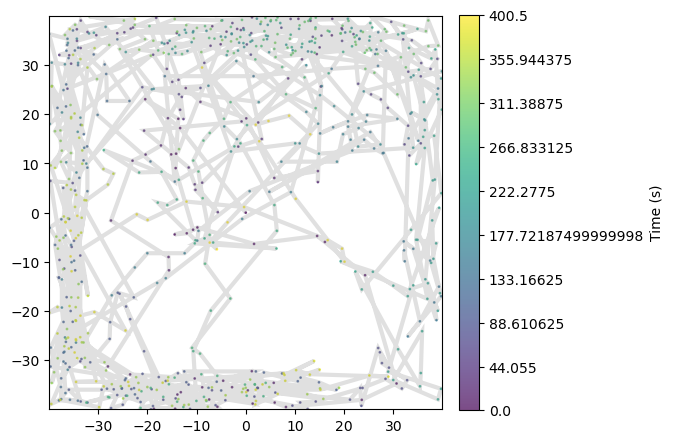

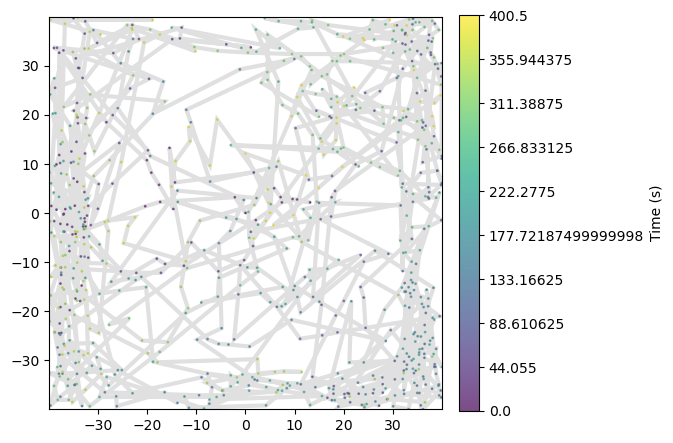

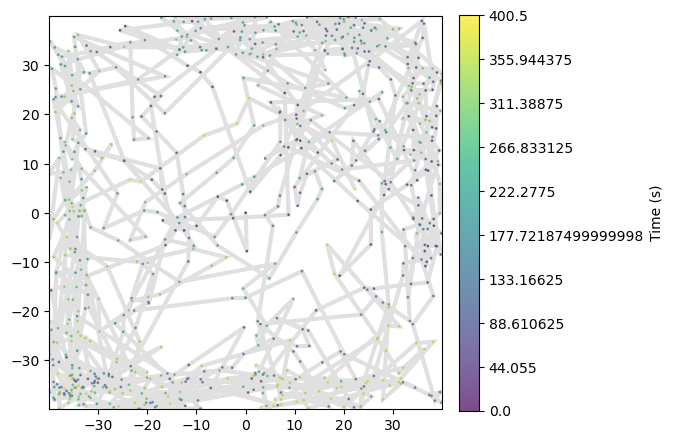

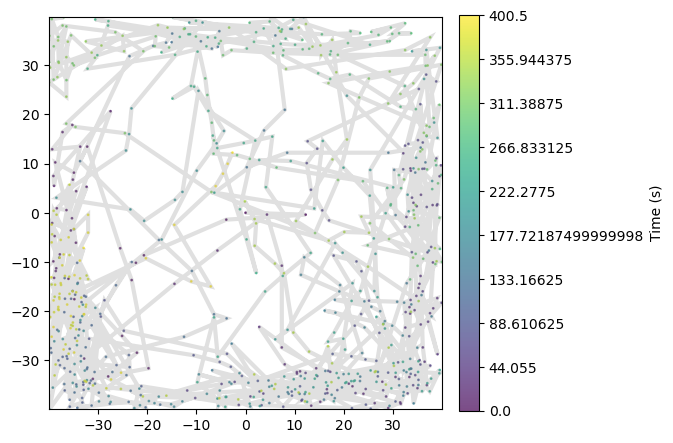

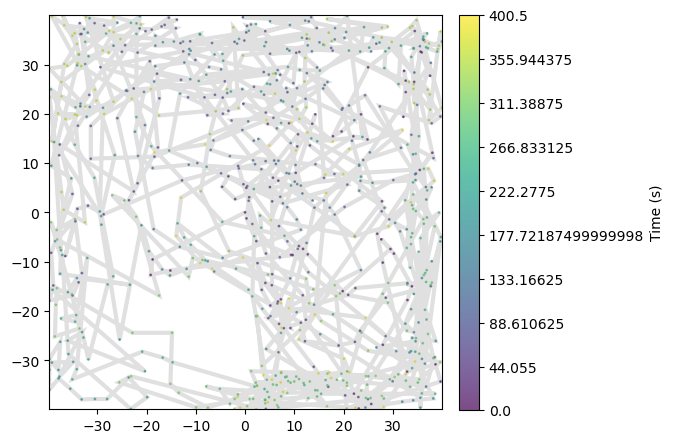

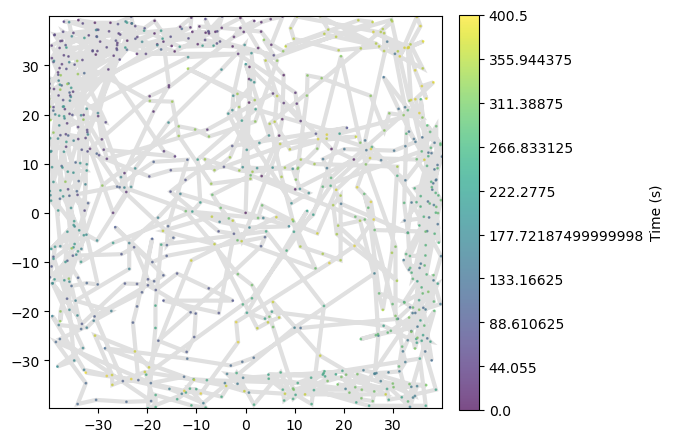

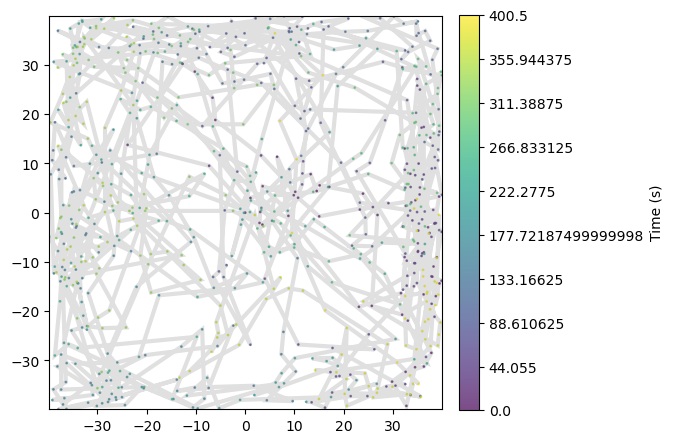

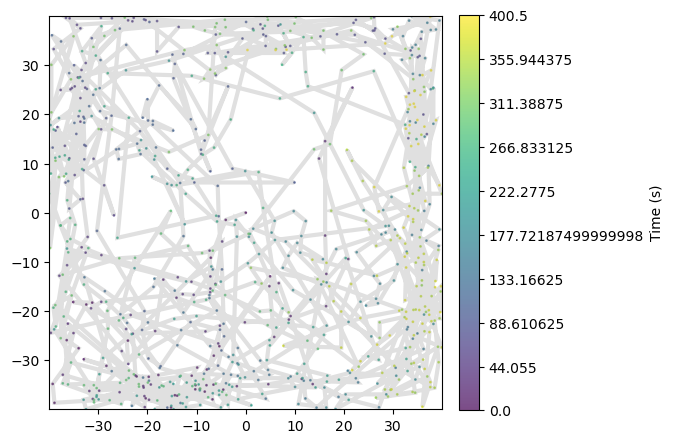

In [20]:
dfs_mod = []
for i in range(8):
    df = makeNewTraj(800)
    dfs_mod.append(df)

In [22]:
for i in range(len(dfs_mod)):
    dfs_mod[i].to_csv('C:\\Users\\Lenovo\\1navigation\\stepdfs\\realdata_mod_'+str(i)+'.csv', index=False)

### compare pribabilities that mouse will leave near-wall zone: this model vs real data

In [22]:
bord = {'xmi':-40, 'xma': 40, 'ymi':-40, 'yma':40}
def addNearWalls(trN, bord_trN):    
    trN['near_wall'] = 0
    ylength = bord_trN['yma'] - bord_trN['ymi'] 
    xlength = bord_trN['xma'] - bord_trN['xmi'] 
    xl = bord_trN['xmi']  + xlength * 0.1
    xr = bord_trN['xma']  - xlength * 0.1
    yd = bord_trN['ymi']  + ylength * 0.1
    yu = bord_trN['yma']  - ylength * 0.1
    
    for i in range(len(trN)):     
        if trN['x'].iloc[i] < xl:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 40
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 30
            else:
                trN['near_wall'].iloc[i] = 4
        elif trN['x'].iloc[i] > xr:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 10
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 20
            else:
                trN['near_wall'].iloc[i] = 2
        elif trN['y'].iloc[i] > yu:
            trN['near_wall'].iloc[i] = 1
        elif trN['y'].iloc[i] < yd:
            trN['near_wall'].iloc[i] = 3
    print(yd, yu)
    
    return trN

In [24]:
for i in range(len(dfs_mod)):
    dfs_mod[i] = addNearWalls(dfs_mod[i], bord)

-32.0 32.0
-32.0 32.0
-32.0 32.0
-32.0 32.0
-32.0 32.0
-32.0 32.0
-32.0 32.0
-32.0 32.0


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\1715813408.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\1715813408.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\1715813408.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Use

In [37]:
from statistics import mean

In [39]:
def findPofEsc(df):
    forP_esc = [] 
    for i in range(len(df)):
        if i < len(df) - 1:
            if (df.iloc[i]['near_wall']>=1) and (df.iloc[i]['near_wall']<=4):
                if df.iloc[i+1]['near_wall'] == df.iloc[i]['near_wall']:
                    forP_esc.append(0)
                else:
                    forP_esc.append(1)
    print(mean(forP_esc))
    return(mean(forP_esc))

In [48]:
p_esc_mod = []
for df in dfs_mod:
    p_esc_mod.append(findPofEsc(df))
print('\nanswer for model')
print(mean(p_esc_mod))
otv_p_mod = mean(p_esc_mod)

0.36885245901639346
0.2988505747126437
0.33613445378151263
0.3111111111111111
0.4520547945205479
0.32231404958677684
0.37373737373737376
0.38405797101449274

answer for model
0.3558890984351065


#### посчитаем вероятность отхода от стены в случае реальности

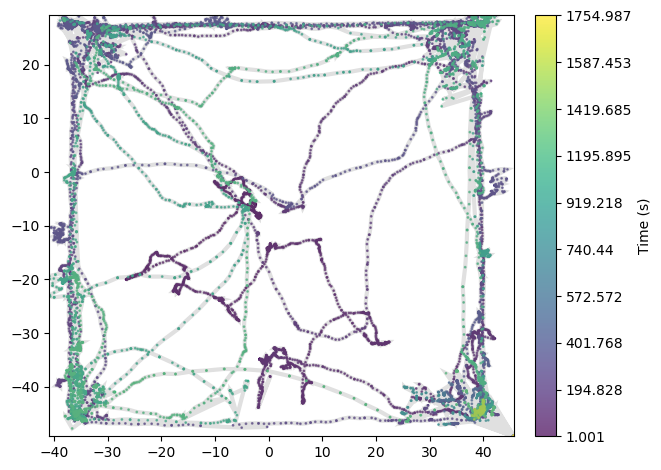

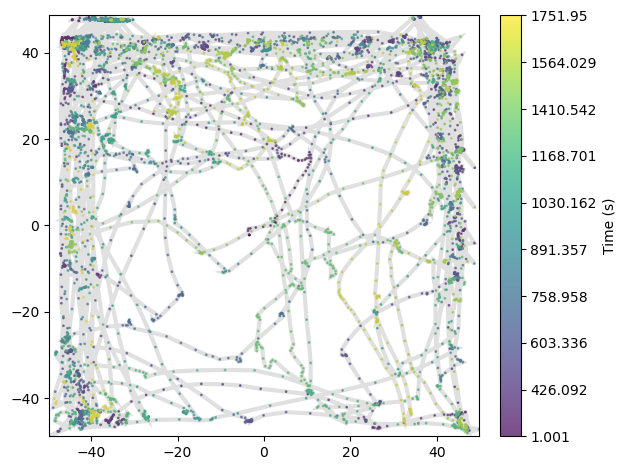

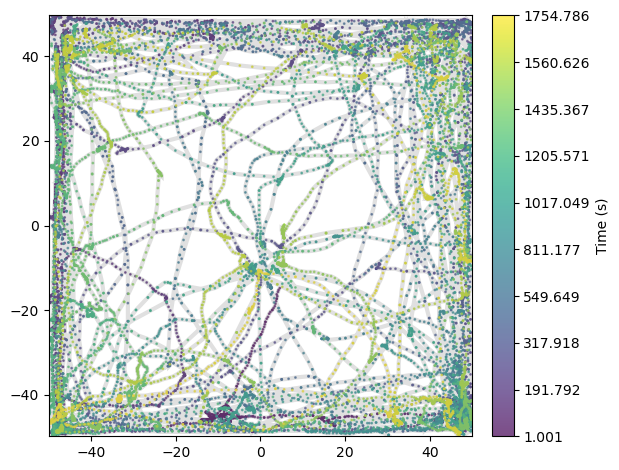

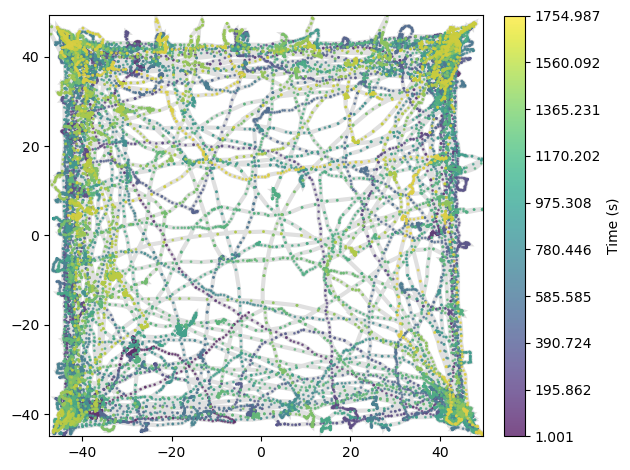

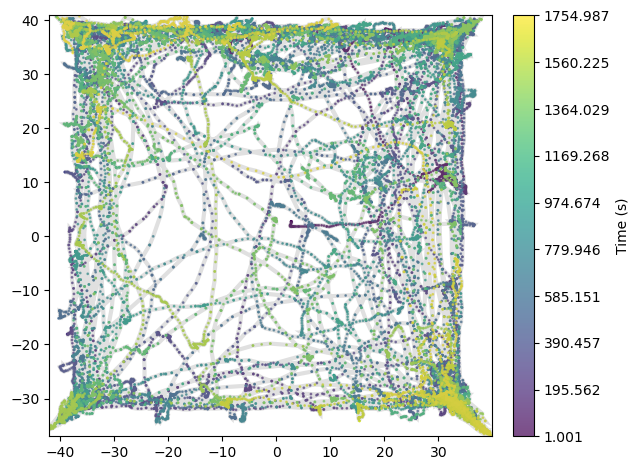

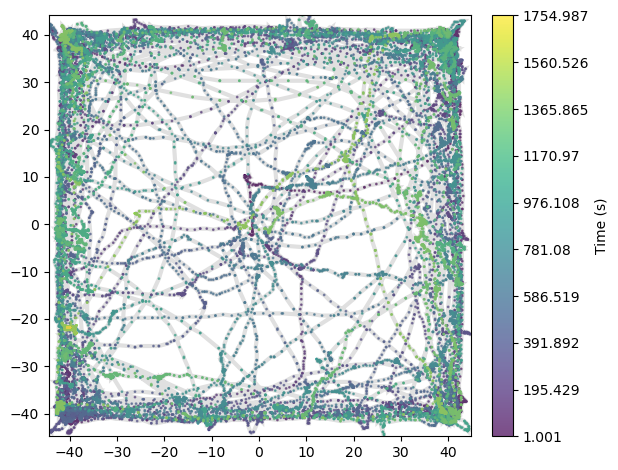

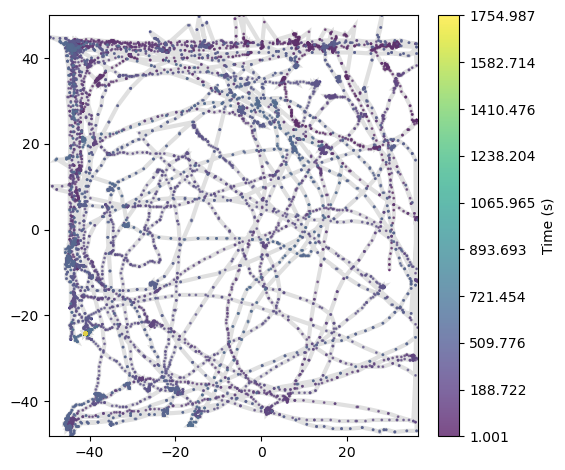

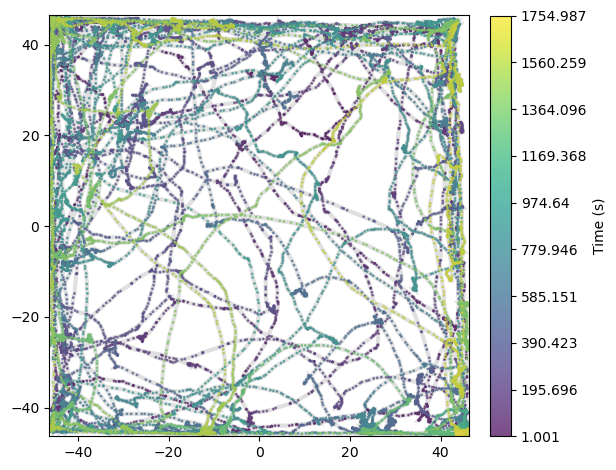

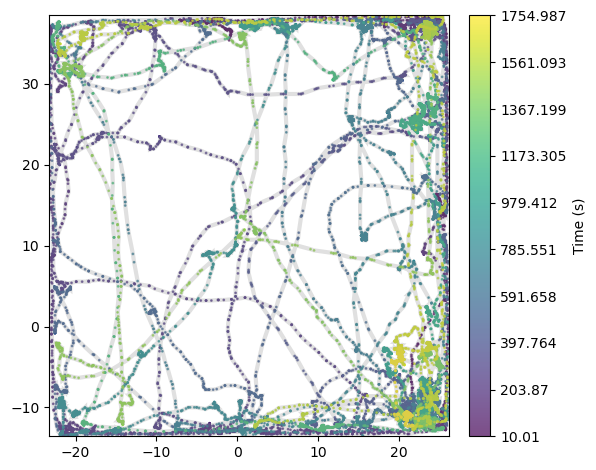

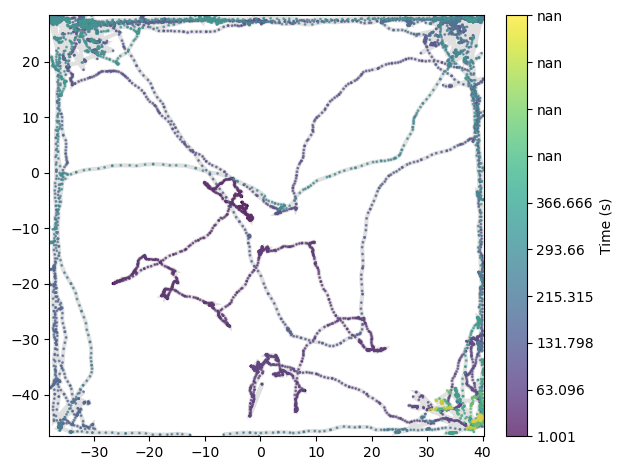

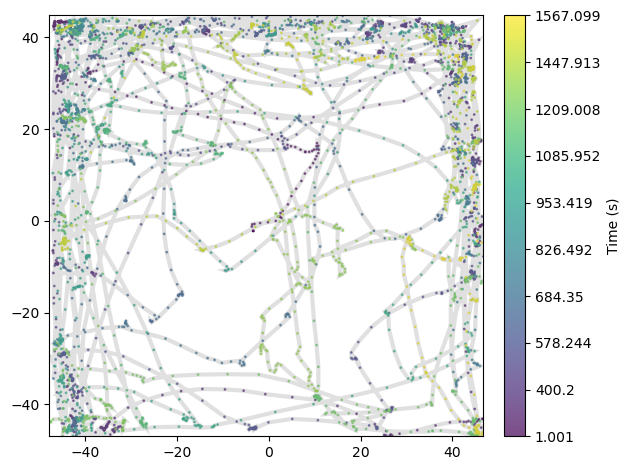

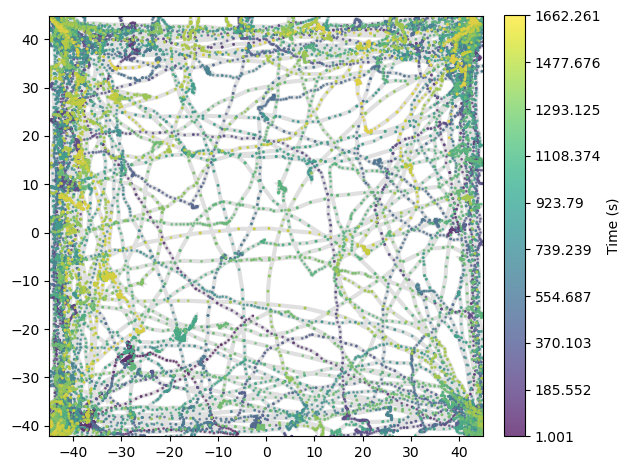

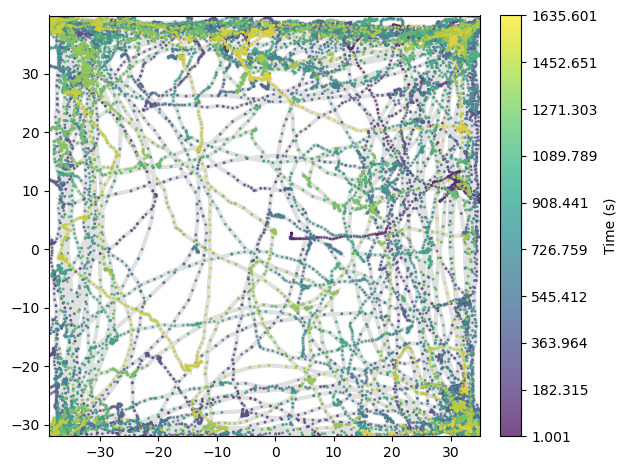

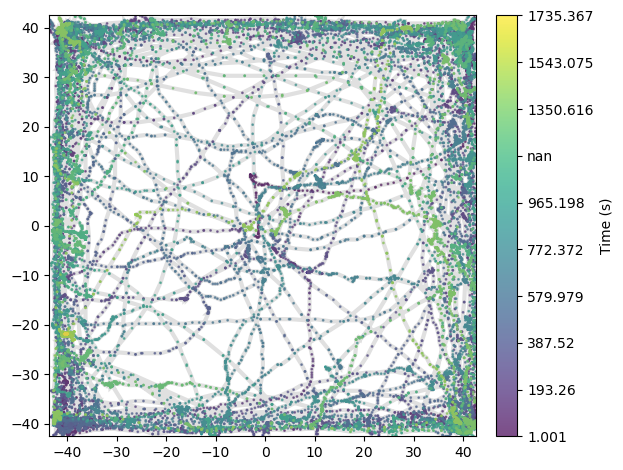

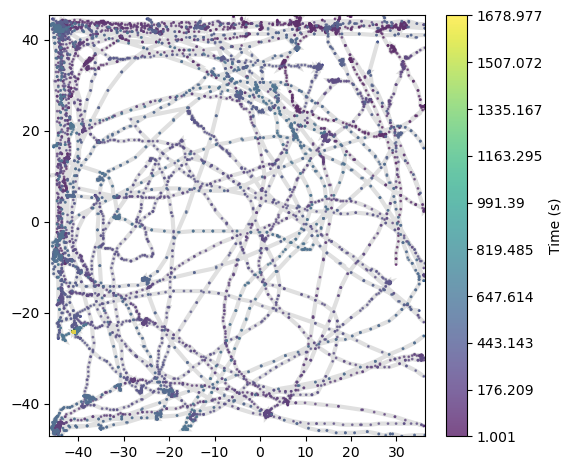

In [46]:
import traja
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy import stats
from scipy.ndimage import gaussian_filter1d


import math

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import pandas as pd

def openFile(ff):
    df = pd.read_csv(ff, sep=" ",header = None, names=['numb', 'time', 'x', 'y'])
    df = df.drop('numb', axis=1)
    df = df.drop(df[df.time > 1755].index)
    df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
    df.traja.plot()
    return(df)

def cutjump(df, xmax, xmin, ymax, ymin):
    dff = df[(df['x'] < xmax) & (df['x'] > xmin) & (df['y'] < ymax) & (df['y'] > ymin)]
    ind = range(0, len(dff))
    dff = dff.reindex(ind)
    dff.traja.plot()
    return dff

#мы добавляем фильтр скорость и НЕФИЛЬТРОВАННЫЕ углы
def addFilteredV(df):
    vx = []
    vy = []
    v = []
    ang = []
    boo = True
    for i in range(len(df)):
        if i == 0:
            vx.append(0)
            vy.append(0)
            v.append(0)
        else:
            dx = df['x'][i]-df['x'][i-1]
            dy = df['y'][i]-df['y'][i-1]
            dt = df['time'][i]-df['time'][i-1]
            vvx = dx/dt
            vvy = dy/dt
            vv = pow(pow(vvx, 2) + pow(vvy, 2), 0.5)
            vx.append(vvx)
            vy.append(vvy)
            v.append(vv)
            # угол
            #хз что делать с 0
            x = vvy/vvx
            if vvx >= 0:
                res = math.degrees(math.atan(x))
            else:
                res = 180 + math.degrees(math.atan(x))
            #убираем перевод в наглядную окружность. пусть остается тригонометрическая
            #if res <= 0:
                #res = -res + 90
                #вообще можно было бы записать и это как 360 - res + 90, т к лишние 360 и так вычитаются через пару строчек
            #elif res > 0:
                #res = 360 - res + 90
            if res >= 360:
                res -= 360
            ang.append(res)
            if boo:
                ang.append(res)
                boo = False
    df.insert(3, "Vx", vx)
    df.insert(4, "Vy", vy)
    df.insert(5, "V", v)
    df.insert(6, "angles", ang)
    #df['V'] = pd.Series(gaussian_filter1d(df['V'], 5))
    #df['Vx'] = pd.Series(gaussian_filter1d(df['Vx'], 5))
    #df['Vy'] = pd.Series(gaussian_filter1d(df['Vy'], 5))
    return(df)

tr4, tr3, tr5, tr6, tr7 = openFile('Trace_4.txt'), openFile('Trace_3.txt'), openFile('Trace_5.txt'), openFile('Trace_6.txt'), openFile('Trace_7.txt')
tr91, tr92 = openFile('Trace_9.1.txt'), openFile('Trace_9.2.txt') 
tr1, tr2 = openFile('Trace_1.1.txt'), openFile('Trace_2.txt')

tr4 = cutjump(tr4, xmax=40.4, xmin=-38.1, ymax=28.3, ymin=-47.6)
tr3 = cutjump(tr3, xmax=46.8, xmin=-48, ymax=46, ymin=-47)
tr6 = cutjump(tr6, xmax=45, xmin=-45, ymax=45, ymin=-42.2)
tr7 = cutjump(tr7, xmax=35, xmin=-38.7, ymax=40, ymin=-32)
tr91 = cutjump(tr91, xmax=42.5, xmin=-43.7, ymax=42.5, ymin=-42.7)
tr92 = cutjump(tr92, xmax=36.3, xmin=-46.5, ymax=45.4, ymin=-47.3)

In [50]:
def returnStepsDFdeltaAng(df, dur):
    time_last = df['time'][0]
    ind_good = [0]
    for i in range(1, len(df)):
        if df['time'][i] - time_last >= dur:
            time_last = df['time'][i]
            ind_good.append(i)    
    df = df.iloc[ind_good]
    df = df.reset_index()
    df = df.drop(['index'], axis=1)
    #delAng = [0] * len(df) - лучше не делать так, а то мы не увидим ошибки типа нанов
    delAng = [0]
    for i in range(1,len(df)):
        d = df['angles'][i]-df['angles'][i-1]
        if d > 180:
            d = d - 360
        if d < -180:
            d = d + 360
        delAng.append(d)
    df['delta_angle'] = delAng
    return df

dfs = [tr1, tr2, tr3, tr4, tr5, tr6, tr7, tr91]
names = ['tr1','tr2','tr3','tr4','tr5','tr6','tr7', 'tr91']

for i in range(len(dfs)):
    print(dfs[i].isna().sum())
    dfs[i] = dfs[i].dropna()
    
for i in range(len(dfs)):
    dfs[i] = dfs[i].reset_index()
    dfs[i] = dfs[i].drop(['index'], axis=1)
    dfs[i] = addFilteredV(dfs[i])

dfs_step = {}
for i in range(len(dfs)):
    print(len(dfs[i]))
    dfs_step[names[i]] = returnStepsDFdeltaAng(dfs[i], 0.5)
    print(len(dfs_step[names[i]]))

time    0
x       0
y       0
dtype: int64
time    0
x       0
y       0
dtype: int64
time    730
x       730
y       730
dtype: int64
time    6994
x       6994
y       6994
dtype: int64
time    0
x       0
y       0
dtype: int64
time    2492
x       2492
y       2492
dtype: int64
time    2945
x       2945
y       2945
dtype: int64
time    588
x       588
y       588
dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  x = vvy/vvx
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\2655828512.py:59: RuntimeWarning: invalid value encountered in double_scalars
  x = vvy/

52523
3503
52298
3487
5467
1429
9761
733
27369
1902
47291
3210
45967
3119
51274
3441


In [54]:
def addNearWalls(trN, bord_trN):    
    trN['near_wall'] = 0
    ylength = bord_trN['yma'] - bord_trN['ymi'] 
    xlength = bord_trN['xma'] - bord_trN['xmi'] 
    xl = bord_trN['xmi']  + xlength * 0.1
    xr = bord_trN['xma']  - xlength * 0.1
    yd = bord_trN['ymi']  + ylength * 0.1
    yu = bord_trN['yma']  - ylength * 0.1
    
    for i in range(len(trN)):     
        if trN['x'].iloc[i] < xl:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 40
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 30
            else:
                trN['near_wall'].iloc[i] = 4
        elif trN['x'].iloc[i] > xr:
            if trN['y'].iloc[i] > yu:
                trN['near_wall'].iloc[i] = 10
            elif trN['y'].iloc[i] < yd:
                trN['near_wall'].iloc[i] = 20
            else:
                trN['near_wall'].iloc[i] = 2
        elif trN['y'].iloc[i] > yu:
            trN['near_wall'].iloc[i] = 1
        elif trN['y'].iloc[i] < yd:
            trN['near_wall'].iloc[i] = 3
    print(yd, yu)
    
    return trN

for i in dfs_step:
    bord_tr = {'xmi':dfs_step[i]['x'].min(), 'xma': dfs_step[i]['x'].max(), 'ymi':dfs_step[i]['y'].min(), 'yma':dfs_step[i]['y'].max()}
    dfs_step[i] = addNearWalls(dfs_step[i], bord_tr)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 10
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-37.0794 36.949400000000004
-8.2409 33.1839
-37.7954 35.617399999999996
-39.637699999999995 20.7487
-39.693599999999996 39.693599999999996


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 4
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 40
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24952\592790605.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trN['near_wall'].iloc[i] = 2
C:\Users\

-33.4707 36.219699999999996
-24.753 32.775
-33.9952 33.9952


In [55]:
p_esc_real = []
for i in dfs_step:
    p_esc_real.append(findPofEsc(dfs_step[i]))
print('\nanswer for real')
print(mean(p_esc_real))
otv_p_real = mean(p_esc_real)

0.076875
0.05643203883495146
0.12186379928315412
0.21739130434782608
0.2208092485549133
0.13910034602076124
0.14595808383233533
0.0976875884851345

answer for real
0.1345146761698845


In [56]:
#вероятность что побег должен удасться если модель показала побег
n_otv = otv_p_real / otv_p_mod
n_otv

0.37796795901128777

In [57]:
p_cancel = 1 - n_otv
p_cancel

0.6220320409887122